In [1]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
print(df.as_matrix().shape)

(284807, 31)


In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.groupby('Class').size())

Class
0    284315
1       492
dtype: int64


In [7]:
num_rec = df['Class'].count()
num_zero = df['Class'][df['Class']==0].count()
num_one = num_rec - num_zero

print("num_rec: {}, num_zero: {}, num_one: {}".format(num_rec, num_zero, num_one))
print("{}% of transactions are fraud and {}% of transactions are legitimate".format((num_one/num_rec)*100,
                                                                                    (num_zero/num_rec)*100))

num_rec: 284807, num_zero: 284315, num_one: 492
0.1727485630620034% of transactions are fraud and 99.82725143693798% of transactions are legitimate


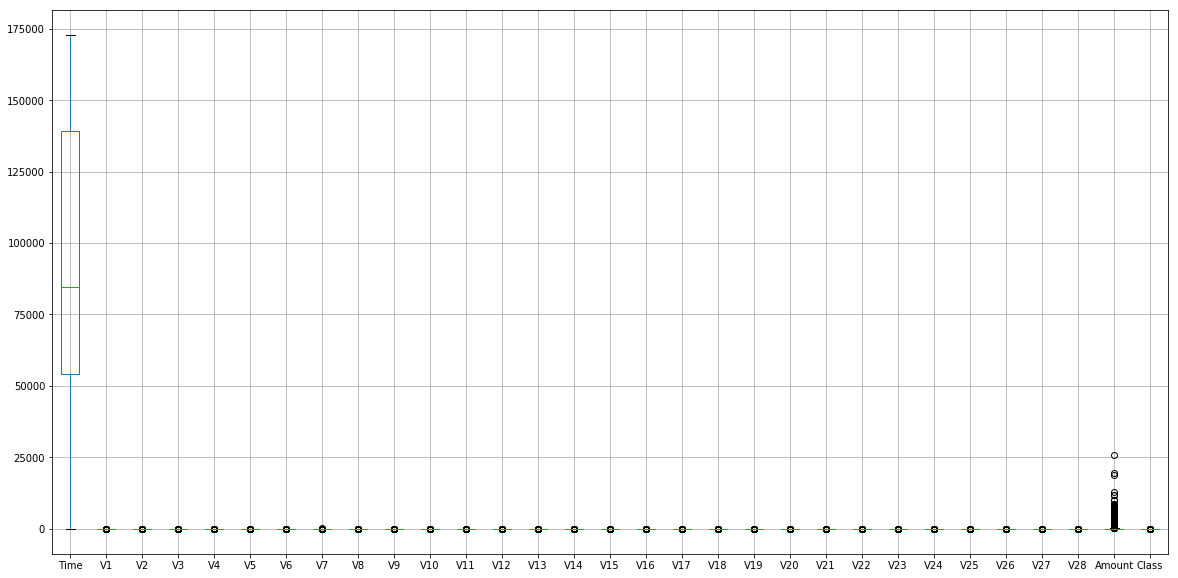

In [11]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(20,10))
plt.show()

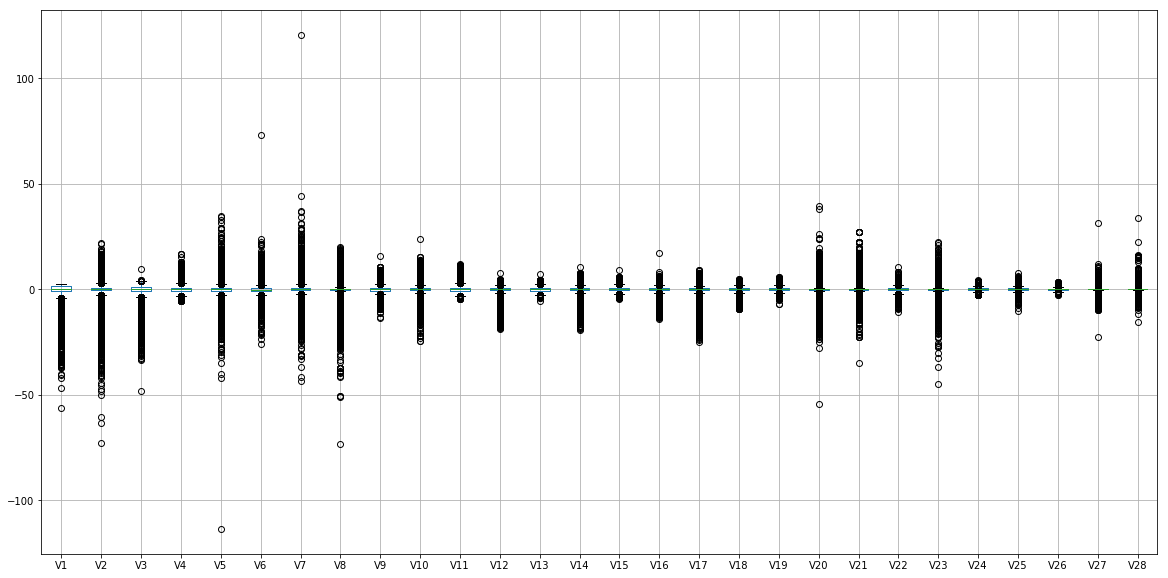

In [12]:
df1 = df.drop(['Time', 'Amount', 'Class'], axis=1)
df1.boxplot(figsize=(20,10))
plt.show()

In [14]:
import numpy as np

raw_data = df.as_matrix()
np.random.seed(123)
np.random.shuffle(raw_data)
np.random.seed(499)
np.random.shuffle(raw_data)

labels = raw_data[:, -1]
data = raw_data[:, :-1]
print("before split:{}; label_shape:{}; data_shape:{}".format(raw_data.shape, labels.shape, data.shape))


before split:(284807, 31); label_shape:(284807,); data_shape:(284807, 30)


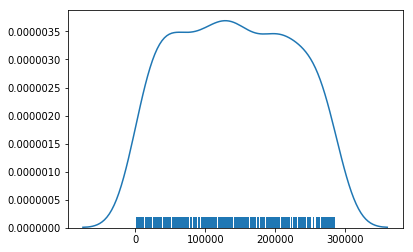

In [15]:
import seaborn as sns
t = []
for i in range(len(labels)):
    if labels[i]==1:
        t.append(i)

sns.distplot(t, kde=True, rug=True, hist=False)
plt.show()

In [16]:
train_size = int(raw_data.shape[0] * 0.7)
train_features  = raw_data[:train_size, :-1]
train_labels = raw_data[:train_size, -1]
test_features = raw_data[train_size:, :-1]
test_labels = raw_data[train_size:, -1]

print("train data:{}; train labels:{}".format(train_features.shape, train_labels.shape))
print("test data:{}; test lables:{}".format(test_features.shape, test_labels.shape))


train data:(199364, 30); train labels:(199364,)
test data:(85443, 30); test lables:(85443,)
